In [1]:
import xarray as xr
import glob

import numpy as np

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [19]:
#*****************************************************************************************#
#                    COMPARACIÓN (TEMPORADAS) PISCO_SENAMHI - RAIN4PE                 
#*****************************************************************************************#
piscoday = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Precday.nc")
RAINday = xr.open_dataset("D:/R/RAIN4PE_daily_0.1d_1981_2015_v1.0.nc")

print(piscoday.longitude.attrs)
seas_pp = piscoday.groupby('z.season').mean()
seas_pcp = RAINday.groupby('time.season').mean()


{'standard_name': 'longitude', 'long_name': 'longitude', 'units': 'degrees_east', 'axis': 'X'}


In [26]:
#seas_pp = seas_pp.rename({'variable': 'pr'})
seas_pp  = seas_pp .rename({'longitude': 'lon', 'latitude': 'lat'})

In [27]:
#seas_pcp = seas_pcp.rename({'pcp': 'pr'})
seas_pcp = seas_pcp.rename({'Longitude': 'lon', 'Latitude': 'lat'})

In [28]:
seas_pcp

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 210, season: 4)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -67.25 -67.15 -67.05
  * lat      (lat) float64 1.95 1.85 1.75 1.65 ... -18.65 -18.75 -18.85 -18.95
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    pr       (season, lat, lon) float32 nan nan nan nan ... 0.2919 0.3013 0.3191
Attributes:
    units:    $mm\,dia^{-1}$

In [29]:
seas_pp.attrs['units'] = '$mm\,dia^{-1}$'
long_pp  = seas_pp ['pr'].lon.values 
lat_pp  = seas_pp ['pr'].lat.values 

seas_pcp.attrs['units'] = '$mm\,dia^{-1}$'
long_pcp  = seas_pcp ['pr'].lon.values 
lat_pcp  = seas_pcp ['pr'].lat.values

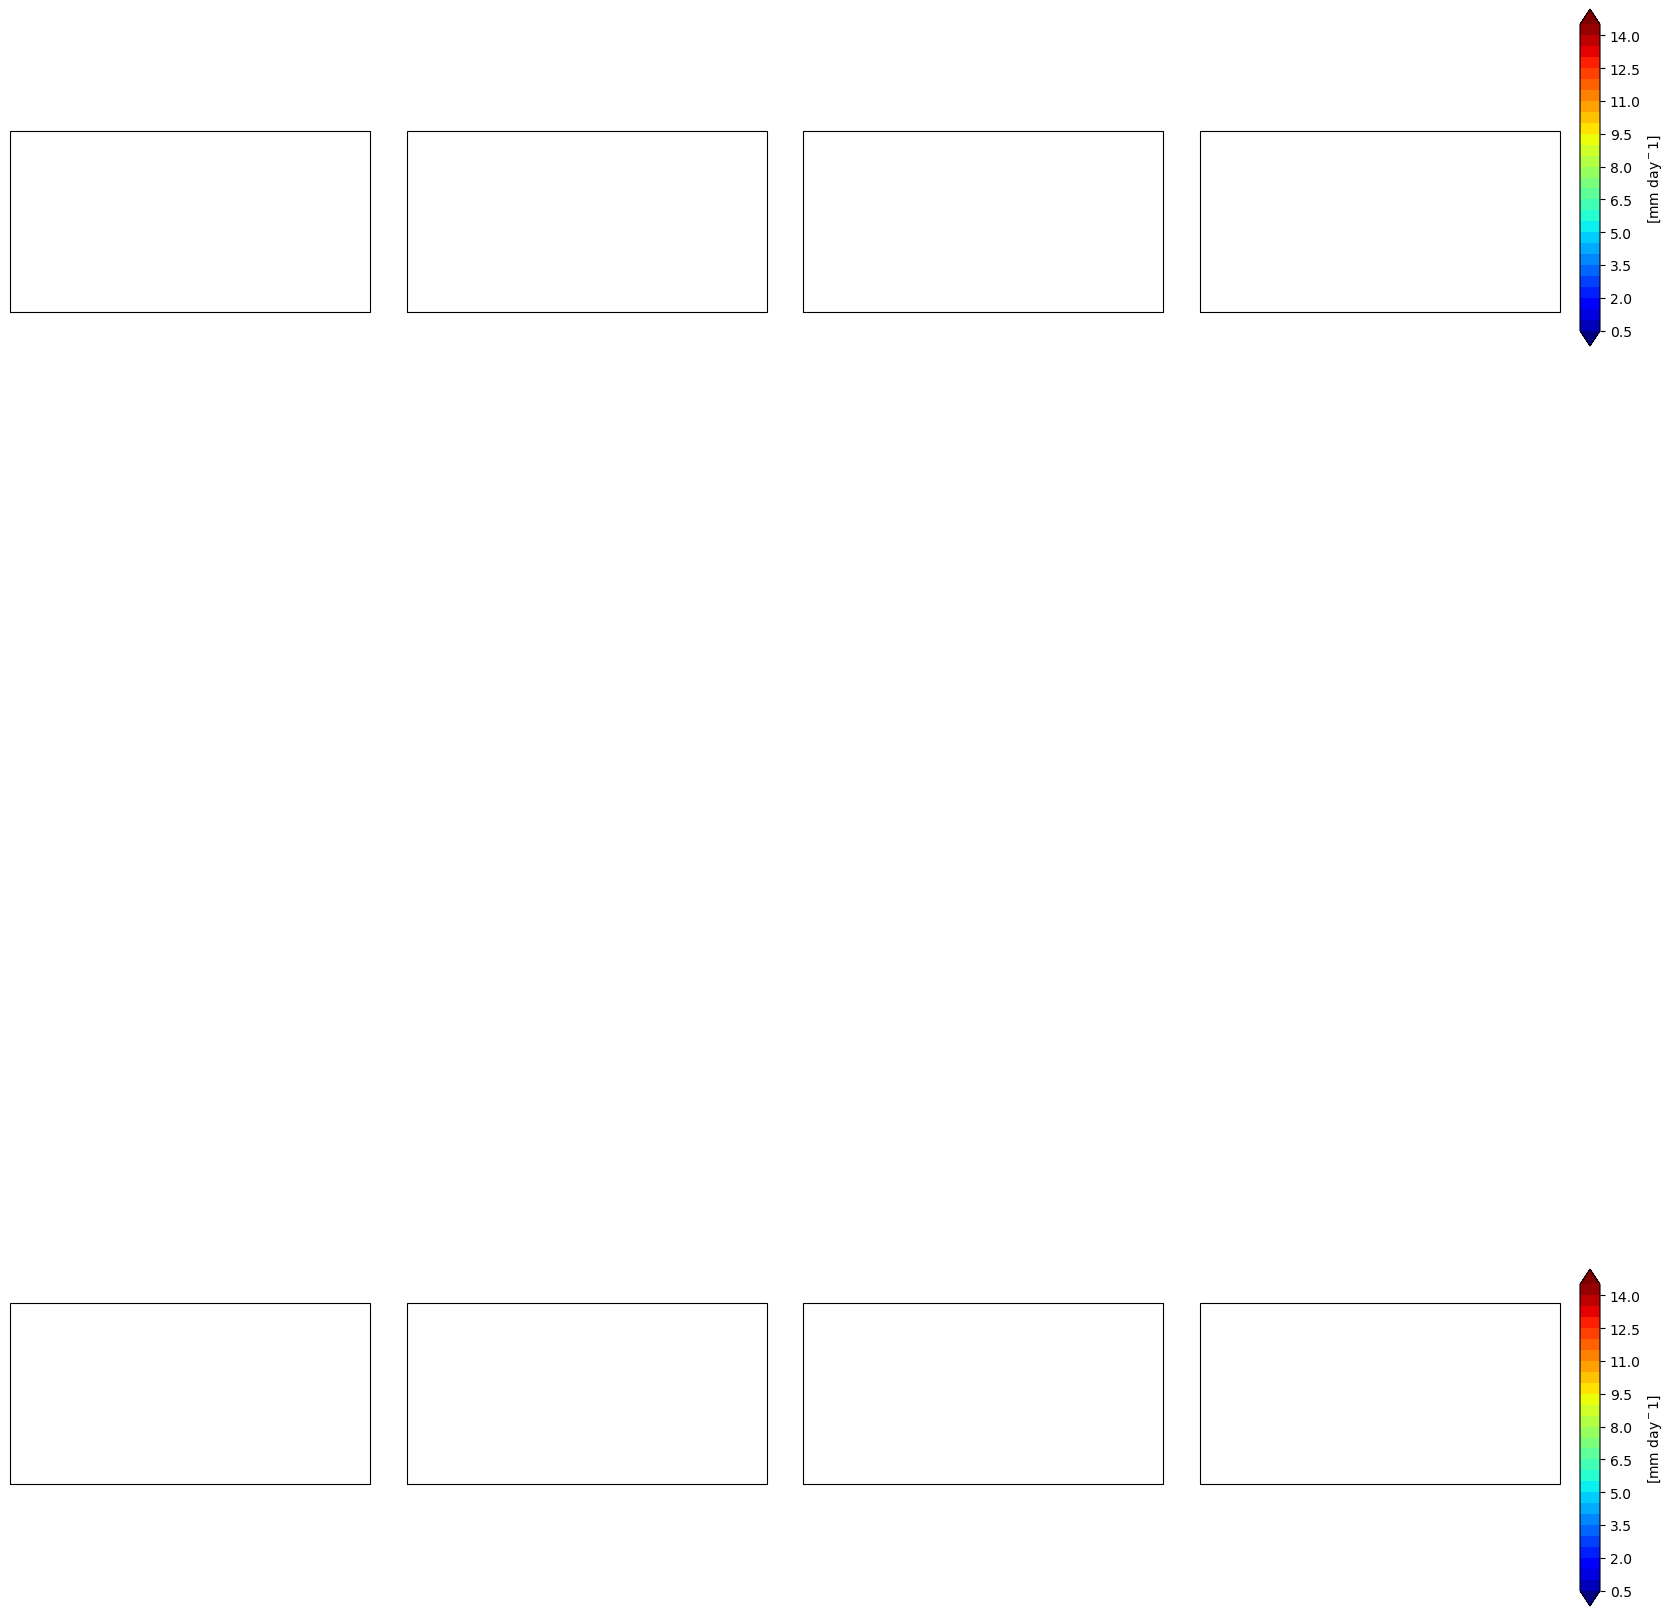

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import cmocean as cm

# Define the projection
projection = ccrs.PlateCarree()

# Set subplots layout and size
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, subplot_kw=dict(projection=ccrs.PlateCarree()))
fig.set_size_inches(20, 30)

# Define a list of datasets and their corresponding season data variables
datasets = [
    ('PISCO', seas_pp),
    ('RAIN4PE', seas_pcp),
]
zzz
seasons = ('DJF', 'MAM', 'JJA', 'SON')

# ... (Tu código existente para crear subtramas) ...

# Create colorbars and set their positions dynamically
for i, (dataset_name, _) in enumerate(datasets):
    cax = fig.add_axes([axes[i, -1].get_position().x1 + 0.01, axes[i, -1].get_position().y0, 0.01, axes[i, -1].get_position().height])
    fig.colorbar(contour_plot, cax=cax, label=f'[mm day$^{-1}$]', orientation='vertical', pad=0.01)

# Adjust layout
plt.subplots_adjust(wspace=0.1, hspace=0.03)

# Save or display the plot
plt.savefig('seasonal_trend_CORDEX22_44.png', transparent=False, dpi=300,bbox_inches='tight')
plt.show()
